### Read pull request data, change data type, processing

In [42]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sys
import datetime

%matplotlib inline

df_prs = pd.read_csv('pull_request.csv')

# Pull Request Number,Title,Author,Created At,Updated At,State,Additions,Deletions,Commits,Merged

df_prs.index = df_prs['Pull Request Number'] 
df_prs.drop(columns=['Pull Request Number'], inplace=True)
df_prs['Created At'] = pd.to_datetime(df_prs['Created At'])
df_prs['Updated At'] = pd.to_datetime(df_prs['Updated At'])
df_prs['Merged'] = df_prs['Merged'].astype('bool')

df_prs.drop(columns=['Updated At', 'State'], inplace=True)
df_prs['Weekday'] = df_prs['Created At'].dt.weekday
df_prs['Year and Month'] = [datetime.datetime(date.year, date.month, 1) for date in df_prs['Created At']]
df_prs['Total Changes'] = df_prs['Additions'] + df_prs['Deletions']
df_prs

,Title,Author,Created At,Additions,Deletions,Commits,Merged,Weekday,Year and Month,Total Changes
Pull Request Number,,,,,,,,,,
5378,Workaround the clang-format inconsistencies,Disservin,2024-06-07 16:41:30+00:00,13,9,1,False,4,2024-06-01,22
5377,Make repeated bench runs identical,cj5716,2024-06-07 10:31:24+00:00,1,0,1,False,4,2024-06-01,1
5375,Remove correction history in null move search,evqsx,2024-06-07 07:39:47+00:00,1,9,2,False,4,2024-06-01,10
5374,Linearize corrHist application,dubslow,2024-06-06 23:42:50+00:00,1,1,1,False,3,2024-06-01,2
5373,Eval: remove `delta`,dubslow,2024-06-06 18:22:43+00:00,8,9,1,False,3,2024-06-01,17
...,...,...,...,...,...,...,...,...,...,...
5,Add AUTHORS,glinscott,2014-06-21 01:36:10+00:00,64,0,2,True,5,2014-06-01,64
4,Scale down endgames with pawns on one or two a...,glinscott,2014-06-20 23:52:41+00:00,23,7,1,False,4,2014-06-01,30
3,Packed like sardines TT,Britvich,2014-06-19 23:55:23+00:00,66,62,1,False,3,2014-06-01,128


### Number of pull requests by month

In [43]:
df_prs_created = pd.DataFrame(df_prs['Year and Month'].value_counts().sort_index())
df_prs_created.columns = ['Number of PRs Created']
df_prs_created.sort_values('Number of PRs Created', ascending=False)

,Number of PRs Created
Year and Month,
2020-08-01,152
2024-05-01,114
2018-03-01,71
2020-07-01,69
2021-06-01,65
...,...
2014-06-01,13
2022-07-01,12
2022-03-01,11


<Axes: title={'center': 'Number of PRs Created by Month'}, xlabel='Time'>

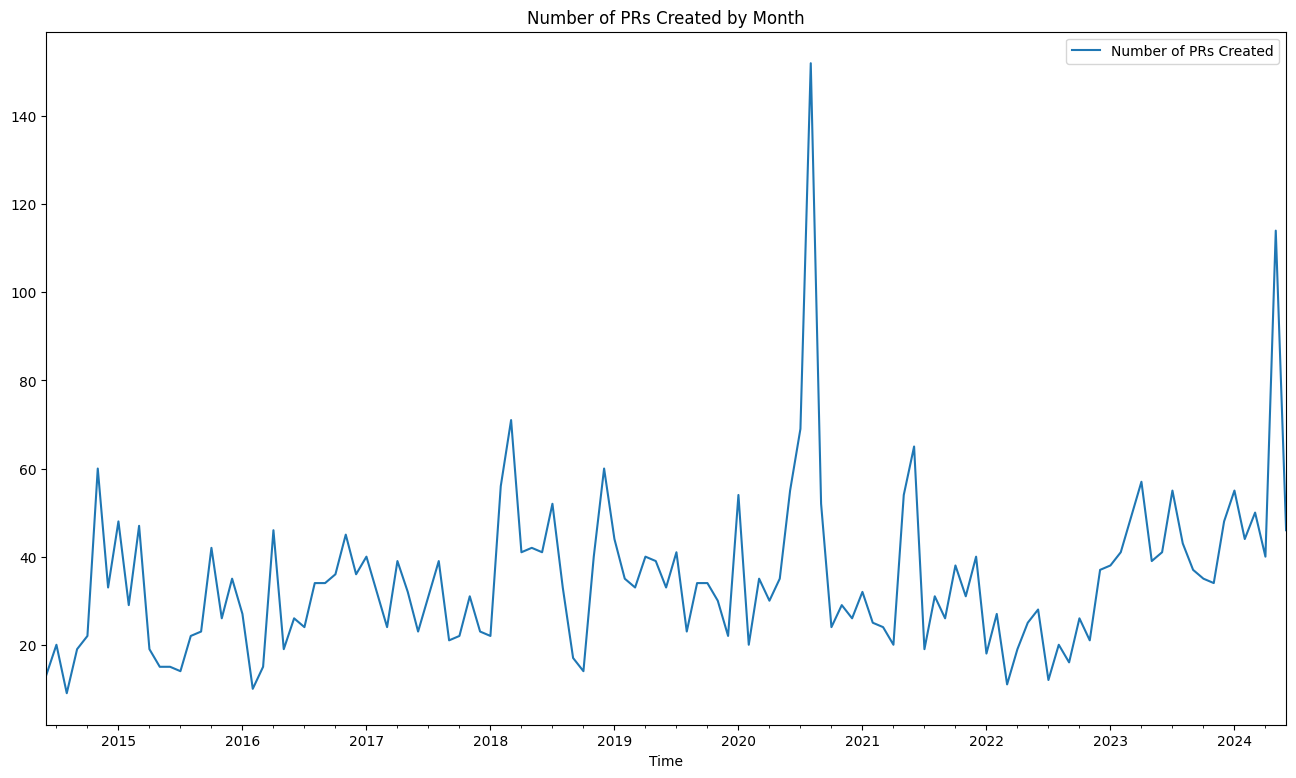

In [44]:
df_prs_created.plot(figsize=(16, 9), title='Number of PRs Created by Month', xlabel='Time')

### Percentage of merged and unmerged pull requests

In [45]:
df_prs_merged = pd.DataFrame(df_prs['Merged'].value_counts().sort_index())
df_prs_merged.index = ['Unmerged', 'Merged']
df_prs_merged.loc['Merged']

count    412
Name: Merged, dtype: int64

<Axes: title={'center': 'Percent of PRs Merged vs Unmerged'}, ylabel='count'>

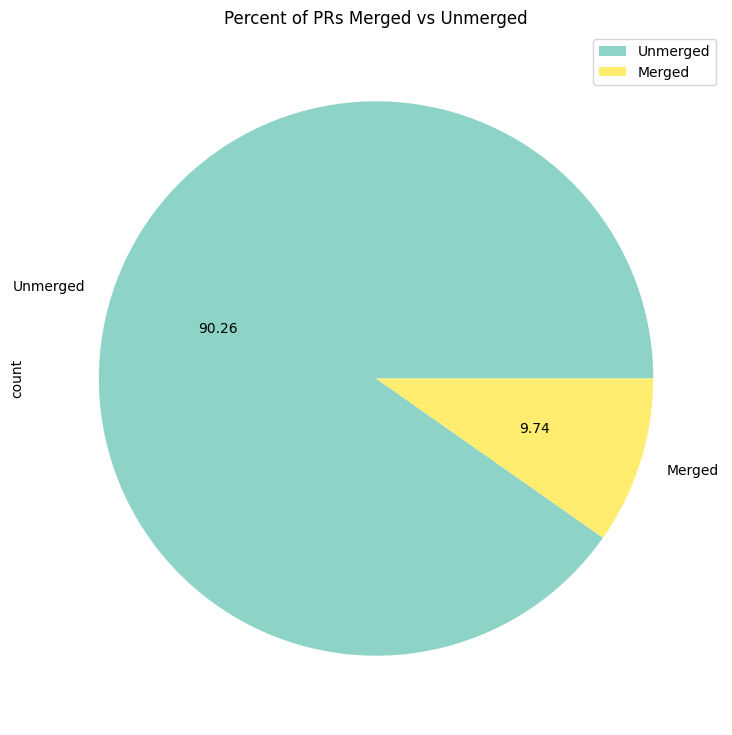

In [46]:
df_prs_merged.plot.pie(figsize=(16, 9), y=0, autopct='%.2f', title='Percent of PRs Merged vs Unmerged', colormap='Set3')

### Sort by total changes

In [47]:
df_prs.sort_values('Total Changes', ascending=False).head()

,Title,Author,Created At,Additions,Deletions,Commits,Merged,Weekday,Year and Month,Total Changes
Pull Request Number,,,,,,,,,,
3384,Just a temporary fake PR to test for compile i...,mstembera,2021-03-06 04:39:33+00:00,93506,2,3,False,5,2021-03-01,93508
3092,Just a temporary fake PR to test for compile i...,mstembera,2020-09-01 04:53:26+00:00,90934,63,1,False,1,2020-09-01,90997
3385,Just a temporary fake PR to test for compile i...,mstembera,2021-03-06 06:42:33+00:00,88252,2,2,False,5,2021-03-01,88254
2813,Sockit,Cooffe,2020-07-12 18:06:40+00:00,33189,3,4,False,6,2020-07-01,33192
5161,Merge SF master in the cluster branch,Disservin,2024-04-10 16:49:06+00:00,11963,13717,327,True,2,2024-04-01,25680


### Sort by number of commits

In [48]:
df_prs.sort_values('Commits', ascending=False).head()

,Title,Author,Created At,Additions,Deletions,Commits,Merged,Weekday,Year and Month,Total Changes
Pull Request Number,,,,,,,,,,
4423,Houdini 6 is a clone of Komodo (not Stockfish!...,Frosty54,2023-03-04 21:02:43+00:00,14280,7515,1920,False,5,2023-03-01,21795
3482,Add more endgame stats.,Sopel97,2021-05-20 11:08:53+00:00,15257,237,650,False,3,2021-05-01,15494
5161,Merge SF master in the cluster branch,Disservin,2024-04-10 16:49:06+00:00,11963,13717,327,True,2,2024-04-01,25680
4921,6commits231214 --> master,Joachim26,2023-12-14 19:10:43+00:00,4682,42,302,False,3,2023-12-01,4724
3116,Ci upgrade distro,vondele,2020-09-09 17:09:35+00:00,9496,351,270,False,2,2020-09-01,9847


### Read commits data, change data type, processing

In [49]:
df_coms = pd.read_csv('commits.csv')
df_coms['Date'] = pd.to_datetime(df_coms['Date'])

df_coms = df_coms[df_coms['Author'] != 'NamedUser(login=None)']
df_coms['Author'] = df_coms['Author'].str.replace('NamedUser(login="', '')
df_coms['Author'] = df_coms['Author'].str.replace('")', '')
df_coms['Committer'] = df_coms['Committer'].str.replace('NamedUser(login="', '')
df_coms['Committer'] = df_coms['Committer'].str.replace('")', '')

df_coms['Weekday'] = df_coms['Date'].dt.weekday
df_coms['Year and Month'] = [datetime.datetime(date.year, date.month, 1) for date in df_coms['Date']]

df_coms

,Author,Committer,Date,Message,Check Runs,Weekday,Year and Month
0,cj5716,Disservin,2024-06-08 21:40:22+00:00,Make repeated bench runs identical fixes http...,True,5,2024-06-01
1,evqsx,Disservin,2024-06-08 21:39:46+00:00,Remove the correction history bonus in null mo...,True,5,2024-06-01
2,dubslow,Disservin,2024-06-08 21:35:00+00:00,Linearize corrHist Passed STC: https://tests....,True,5,2024-06-01
3,dubslow,Disservin,2024-06-08 21:34:03+00:00,Remove delta from evaluation Passed STC: http...,True,5,2024-06-01
4,Sopel97,Disservin,2024-06-08 21:32:27+00:00,NumaPolicy fixes and robustness improvements ...,True,5,2024-06-01
...,...,...,...,...,...,...,...
6241,mcostalba,mcostalba,2008-09-01 12:05:02+00:00,Rewrite ucioptions.cpp to use C++ Instead of ...,True,0,2008-09-01
6242,mcostalba,mcostalba,2008-09-01 06:16:17+00:00,Finally remove UCIInputParser class altogether...,True,0,2008-09-01
6243,mcostalba,mcostalba,2008-09-01 06:06:34+00:00,Use a string stream in UCIInputParser Use a s...,True,0,2008-09-01
6244,mcostalba,mcostalba,2008-09-01 06:03:21+00:00,Avoid casts to handle isspace() arguments Use...,True,0,2008-09-01


### Number of commits by month

<Axes: title={'center': 'Number of Commits by Month'}, xlabel='Time'>

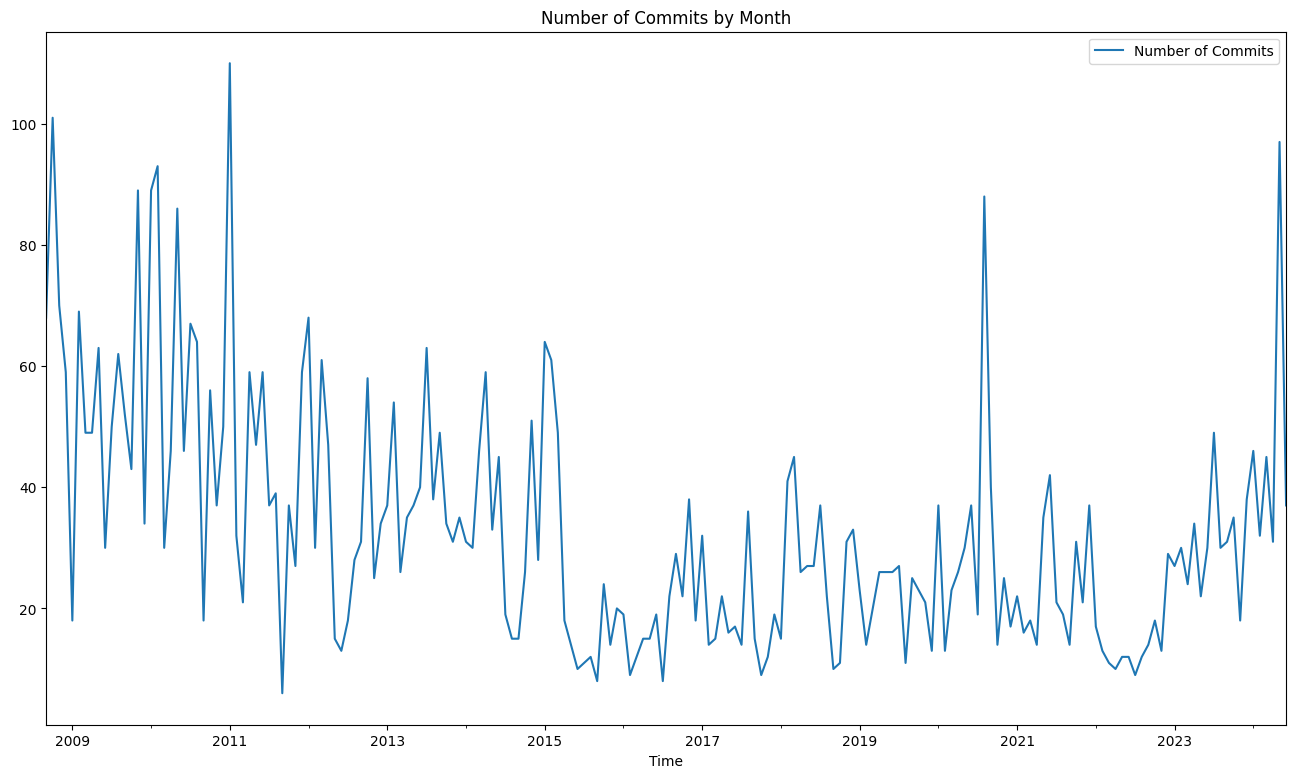

In [50]:
df_coms_created = pd.DataFrame(df_coms['Year and Month'].value_counts().sort_index())
df_coms_created.columns = ['Number of Commits']
df_coms_created.plot(figsize=(16, 9), title='Number of Commits by Month', xlabel='Time')

### Number of commits by weekday

In [51]:
df_prs_weekday = pd.DataFrame(df_prs['Weekday'].value_counts().sort_index())
df_prs_weekday.columns = ['Number of PRs']
df_coms_weekday = pd.DataFrame(df_coms['Weekday'].value_counts().sort_index())
df_coms_weekday.columns = ['Number of Commits']

df_weekday = pd.concat([df_prs_weekday, df_coms_weekday], axis=1)
df_weekday.columns = ['Number of PRs', 'Number of Commits']
df_weekday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekday

,Number of PRs,Number of Commits
Monday,596,861
Tuesday,589,726
Wednesday,546,716
Thursday,580,744
Friday,556,683
Saturday,690,1248
Sunday,672,1265


<Axes: title={'center': 'Number of PRs and Commits by Weekday'}>

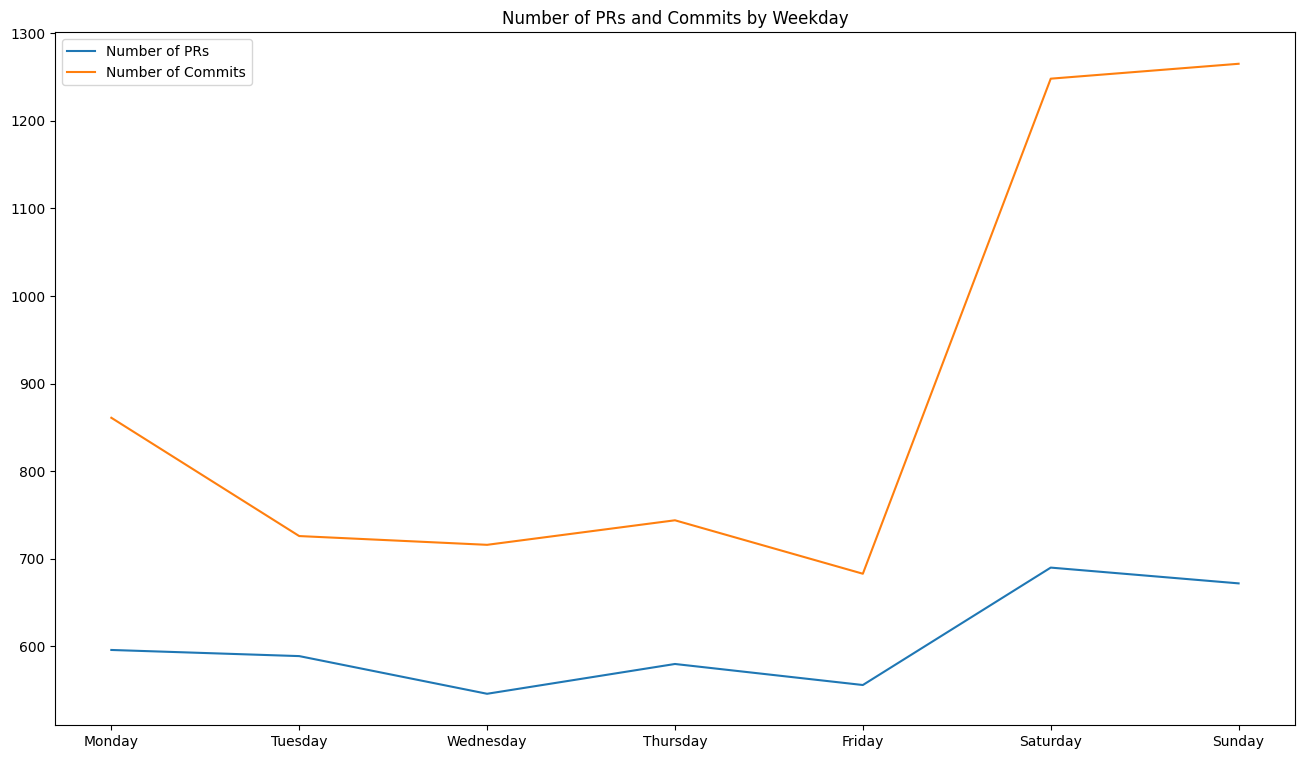

In [52]:
df_weekday.plot(figsize=(16, 9), title='Number of PRs and Commits by Weekday')

### Percent of all check passed commits

In [53]:
round(len(df_coms[df_coms['Check Runs'] == True]) / len(df_coms) * 100, 2)

99.81

### Top contributor in commits

In [54]:
df_coms_author = pd.DataFrame(df_coms['Author'].value_counts())
df_coms_author.columns = ['Author Count']

df_coms_committer = pd.DataFrame(df_coms['Committer'].value_counts())
df_coms_committer.columns = ['Committer Count']

df_coms_contributor = pd.merge(df_coms_author, df_coms_committer, how='outer', left_index=True, right_index=True)
df_coms_contributor.fillna(0, inplace=True)
df_coms_contributor['Total Contribute'] = df_coms_contributor['Author Count'] + df_coms_contributor['Committer Count']
df_coms_contributor.drop(index='Unknown', inplace=True)
df_coms_contributor.sort_values('Total Contribute', ascending=False, inplace=True)

df_coms_contributor.head()

,Author Count,Committer Count,Total Contribute
mcostalba,3067.0,3767.0,6834.0
vondele,316.0,1011.0,1327.0
snicolet,191.0,666.0,857.0
zamar,269.0,345.0,614.0
Disservin,88.0,255.0,343.0


<Axes: title={'center': 'Top Contributors by Commits'}>

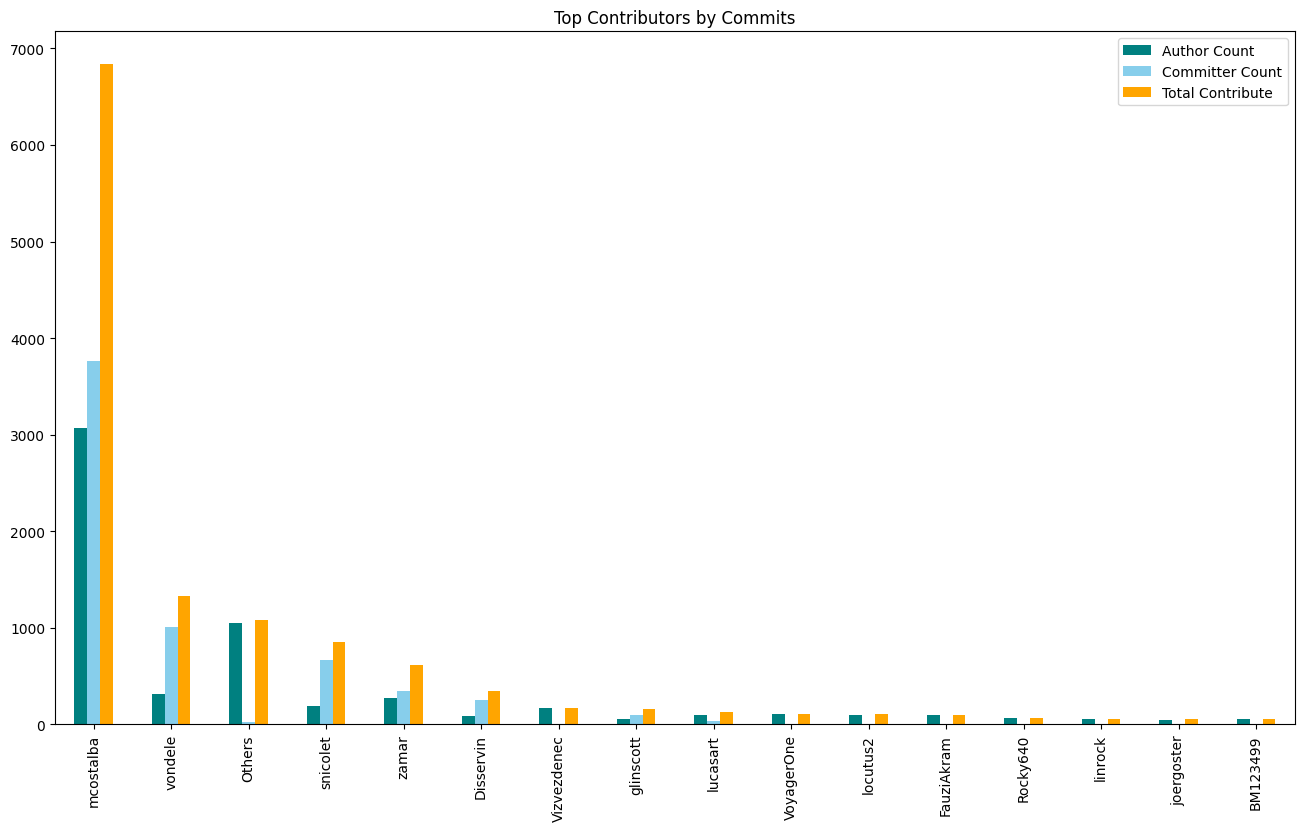

In [55]:
df_coms_other = df_coms_contributor[df_coms_contributor['Total Contribute'] < 50].sum()
df_coms_contributor = df_coms_contributor[df_coms_contributor['Total Contribute'] >= 50]
df_coms_contributor.loc['Others'] = df_coms_other
df_coms_contributor.sort_values('Total Contribute', ascending=False, inplace=True)
df_coms_contributor.plot.bar(figsize=(16, 9), title='Top Contributors by Commits', color=['teal', 'skyblue', 'orange'])

### Relationship between Number of pull requests and Number of commits 

<Axes: title={'center': 'Relationship between Number of pull requests and Number of commits '}, xlabel='Number of PRs Created', ylabel='Number of Commits Created'>

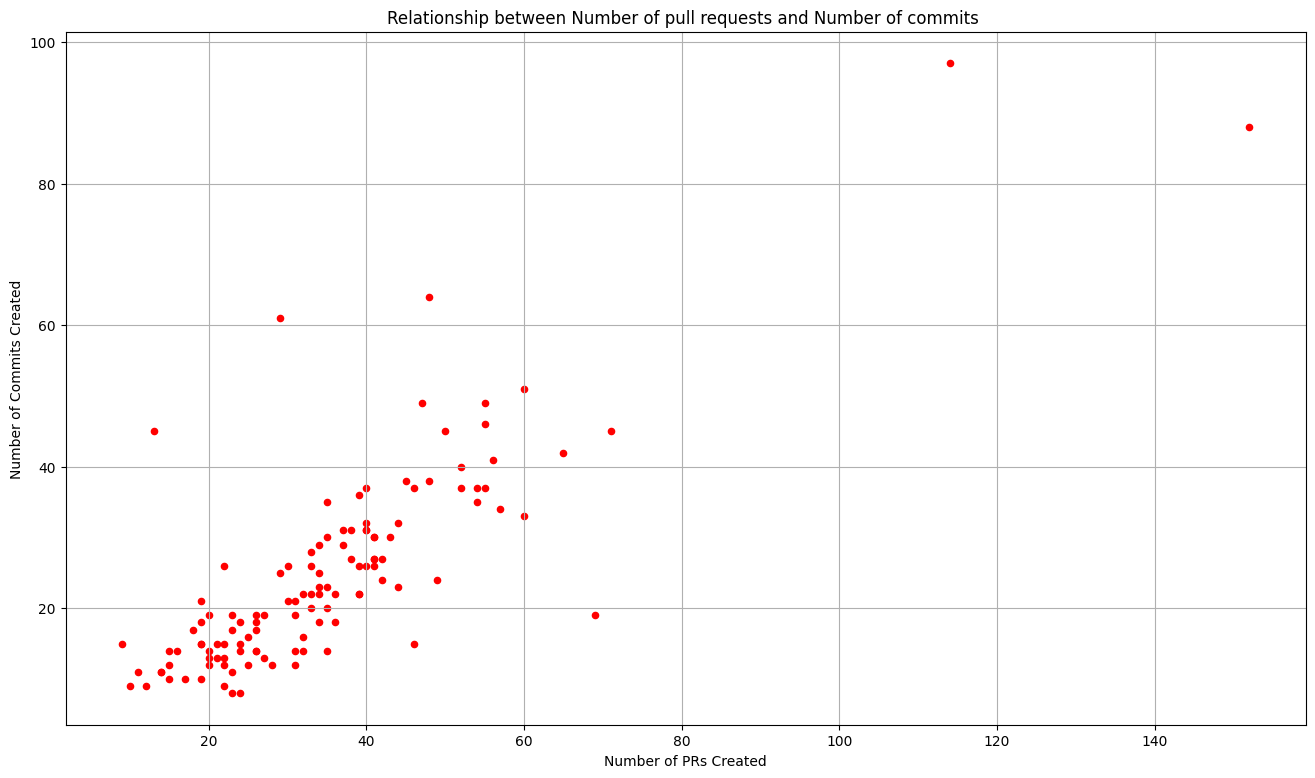

In [56]:
df_prs_coms_created = pd.merge(df_prs_created, df_coms_created, how='inner', left_index=True, right_index=True)
df_prs_coms_created.fillna(0, inplace=True)
df_prs_coms_created.columns = ['Number of PRs Created', 'Number of Commits Created']
df_prs_coms_created.plot.scatter(x='Number of PRs Created', y='Number of Commits Created', figsize=(16, 9), title='Relationship between Number of pull requests and Number of commits ', color = 'red', grid=True)

### Top used words in message

In [57]:
message_list = ""
for message in df_coms['Message']:
    message_list += message + ' '
replace = ['.', ',', '!', '?', ':', ';', '(', ')', '[', ']', '{', '}', '"', "'", '<', '>', '/', '\\', '|', '-', '_', '+', '=', '*', '&', '^', '%', '$', '#', '@', '`', '~', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
for char in replace:
    message_list = message_list.replace(char, ' ')
message_list = message_list.lower()
message_list= message_list.split()
df_words = pd.DataFrame(message_list, columns=['Words'])
df_words = df_words[df_words['Words'].str.len() >= 3]
df_words = pd.DataFrame(df_words['Words'].value_counts())
df_words.columns = ['Word Count']

df_words.head(20)

,Word Count
Words,
the,9882
tests,6400
com,4556
stockfish,4363
and,4272
https,4216
change,3836
total,3753
functional,3572


<Axes: title={'center': 'Top Words in Commit Messages'}, xlabel='Words'>

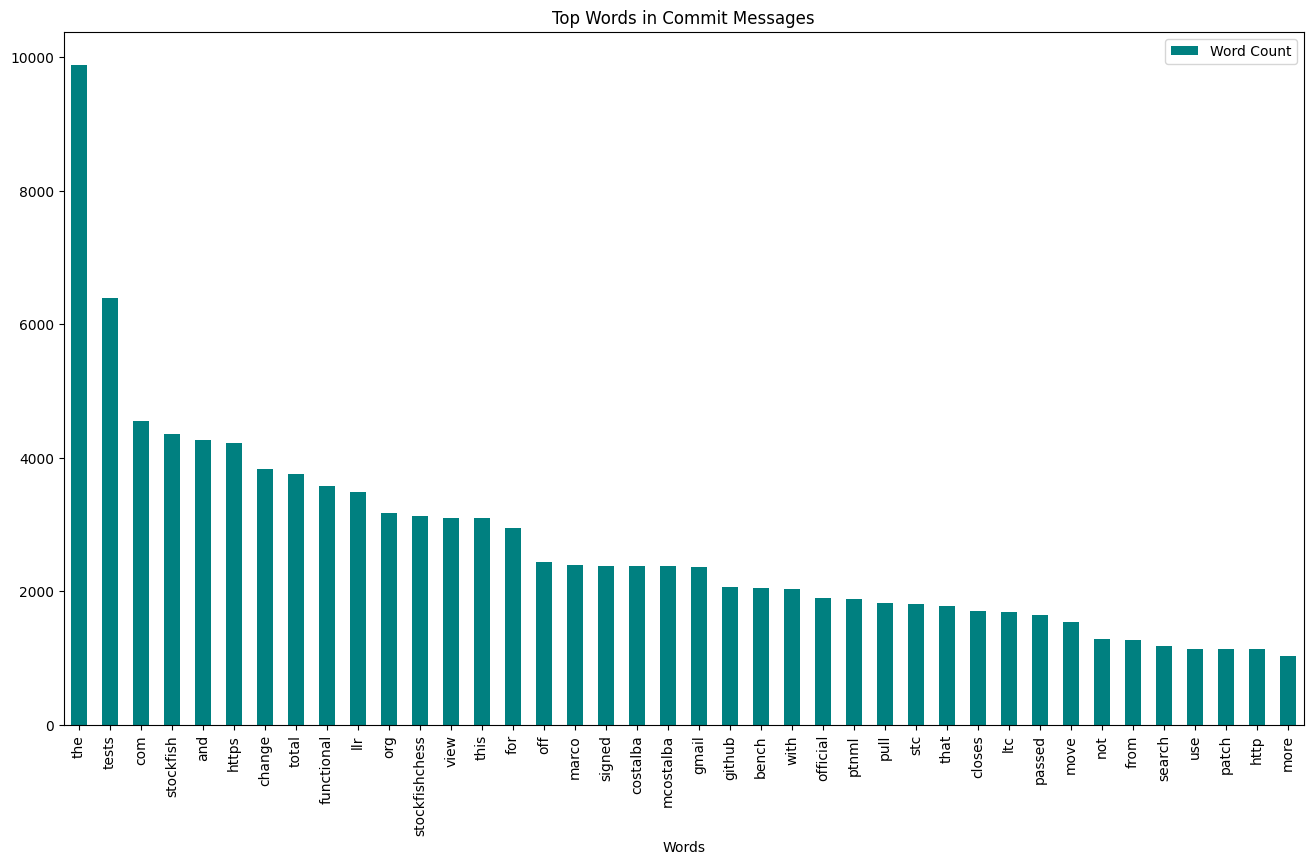

In [58]:
df_words[df_words['Word Count'] >= 1000].plot.bar(figsize=(16, 9), title='Top Words in Commit Messages', color='teal')

In [59]:
title_len = df_prs['Title'].str.len().sum()
message_len = df_coms['Message'].str.len().sum()

print(round(title_len / len(df_prs)))
print(round(message_len / len(df_coms)))

34
393


### Chess pieces in commit message

In [60]:
df_chess = df_words.loc[['king', 'queen', 'pawn', 'rook', 'bishop', 'knight']]
df_chess.sort_values('Word Count', ascending=False, inplace=True)
df_chess

,Word Count
Words,
pawn,561
king,381
queen,150
rook,133
bishop,74
knight,44


In [61]:
df_prs.to_csv('pull_request_cleaned.csv')
df_coms.to_csv('commits_cleaned.csv', index=False)